In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

In [2]:
df = pd.read_csv('../Data/smartwatches.csv')
df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

In [3]:
df.drop_duplicates(inplace=True)

### My Training data should not have any information regarding my test data

In [4]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [5]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [6]:
# train_df

In [7]:
# test_df

In [8]:
print(train_df.shape, test_df.shape)

(360, 17) (90, 17)


In [9]:
train_df.dtypes

index                    int64
Unnamed: 0               int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [10]:
train_df.isnull().sum()

index                    0
Unnamed: 0               0
Brand                    0
Current Price            6
Original Price          56
Discount Percentage     56
Rating                   4
Number OF Ratings       45
Model Name              30
Dial Shape             100
Strap Color            100
Strap Material          56
Touchscreen             31
Battery Life (Days)     30
Bluetooth                5
Display Size            27
Weight                 149
dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Unnamed: 0           360 non-null    int64  
 2   Brand                360 non-null    object 
 3   Current Price        354 non-null    float64
 4   Original Price       304 non-null    float64
 5   Discount Percentage  304 non-null    float64
 6   Rating               356 non-null    float64
 7   Number OF Ratings    315 non-null    float64
 8   Model Name           330 non-null    object 
 9   Dial Shape           260 non-null    object 
 10  Strap Color          260 non-null    object 
 11  Strap Material       304 non-null    object 
 12  Touchscreen          329 non-null    object 
 13  Battery Life (Days)  330 non-null    float64
 14  Bluetooth            355 non-null    object 
 15  Display Size         333 non-null    obj

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                90 non-null     int64  
 1   Unnamed: 0           90 non-null     int64  
 2   Brand                90 non-null     object 
 3   Current Price        86 non-null     float64
 4   Original Price       73 non-null     float64
 5   Discount Percentage  73 non-null     float64
 6   Rating               88 non-null     float64
 7   Number OF Ratings    76 non-null     float64
 8   Model Name           85 non-null     object 
 9   Dial Shape           67 non-null     object 
 10  Strap Color          67 non-null     object 
 11  Strap Material       77 non-null     object 
 12  Touchscreen          84 non-null     object 
 13  Battery Life (Days)  88 non-null     float64
 14  Bluetooth            89 non-null     object 
 15  Display Size         87 non-null     objec

In [13]:
numerical_features = [col for col in train_df.columns if train_df[col].dtype != 'O']
continuous_features = [col for col in train_df.columns if train_df[col].dtype == 'O']

In [14]:
continuous_features

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [15]:
train_df[numerical_features].describe()

index  Unnamed: 0  Current Price  Original Price  \
count  360.000000  360.000000     354.000000      304.000000   
mean   222.702778  222.702778   12514.378531    14415.835526   
std    130.632905  130.632905   16914.978666    15613.457236   
min      0.000000    0.000000    1199.000000     1669.000000   
25%    111.750000  111.750000    2126.000000     5999.000000   
50%    222.500000  222.500000    3999.000000     7994.500000   
75%    336.250000  336.250000   17367.250000    17996.000000   
max    448.000000  448.000000   98990.000000    96390.000000   

       Discount Percentage      Rating  Number OF Ratings  Battery Life (Days)  
count           304.000000  356.000000         315.000000           330.000000  
mean             47.955347    4.027528       10671.815873            14.181970  
std              24.696899    0.556828       27575.956948             7.661878  
min             -79.688436    1.000000           1.000000             0.750000  
25%              33.177427    3.900000          55.000000             8.000000  
50%              53.068408    4.100000         830.000000            17.500000  
75%              66.677780    4.300000        7576.500000            22.000000  
max              91.004550    5.000000      275607.000000            22.000000

In [16]:
train_df[numerical_features].corr()

index  Unnamed: 0  Current Price  Original Price  \
index                1.000000    1.000000      -0.100146       -0.084262   
Unnamed: 0           1.000000    1.000000      -0.100146       -0.084262   
Current Price       -0.100146   -0.100146       1.000000        0.971497   
Original Price      -0.084262   -0.084262       0.971497        1.000000   
Discount Percentage -0.123792   -0.123792      -0.602668       -0.479494   
Rating              -0.247504   -0.247504       0.397179        0.325818   
Number OF Ratings   -0.187509   -0.187509      -0.195773       -0.180650   
Battery Life (Days)  0.371223    0.371223       0.030352       -0.132527   

                     Discount Percentage    Rating  Number OF Ratings  \
index                          -0.123792 -0.247504          -0.187509   
Unnamed: 0                     -0.123792 -0.247504          -0.187509   
Current Price                  -0.602668  0.397179          -0.195773   
Original Price                 -0.479494  0.325818          -0.180650   
Discount Percentage             1.000000 -0.191073           0.235221   
Rating                         -0.191073  1.000000           0.085250   
Number OF Ratings               0.235221  0.085250           1.000000   
Battery Life (Days)            -0.011792 -0.102289           0.009617   

                     Battery Life (Days)  
index                           0.371223  
Unnamed: 0                      0.371223  
Current Price                   0.030352  
Original Price                 -0.132527  
Discount Percentage            -0.011792  
Rating                         -0.102289  
Number OF Ratings               0.009617  
Battery Life (Days)             1.000000

In [17]:
train_df[numerical_features].skew()

index                  0.012368
Unnamed: 0             0.012368
Current Price          2.301689
Original Price         2.734265
Discount Percentage   -0.983632
Rating                -1.589043
Number OF Ratings      5.467630
Battery Life (Days)   -0.190298
dtype: float64

In [18]:
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Understand the data with visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
numerical_features.remove("index")
numerical_features.remove("Unnamed: 0")

In [23]:
numerical_features

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

<AxesSubplot: ylabel='Current Price'>

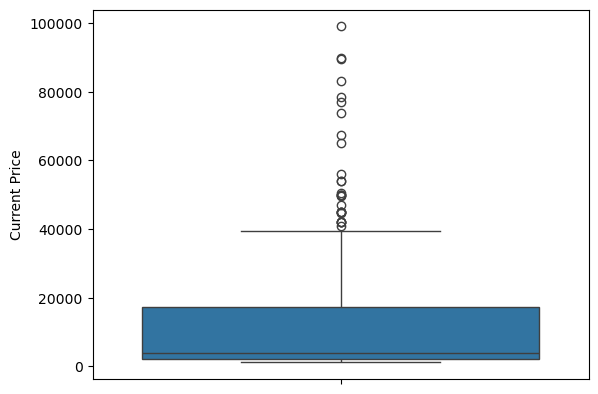

In [26]:
sns.boxplot(train_df['Current Price'])

/tmp/ipykernel_6358/305254979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Current Price'])


<AxesSubplot: xlabel='Current Price', ylabel='Density'>

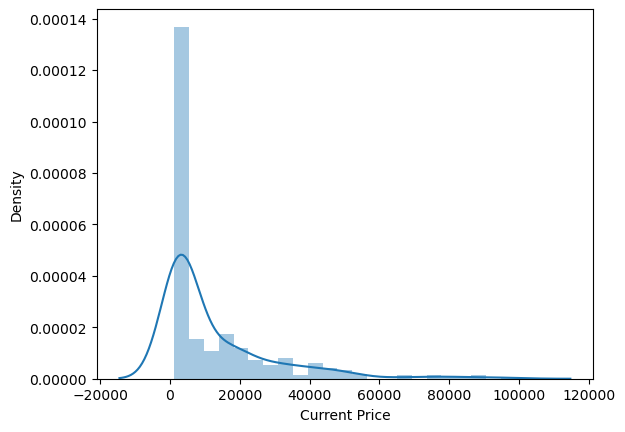

In [27]:
sns.distplot(train_df['Current Price'])

### Data is Positive Skewed and here we can see outliers on the right side
#### Here Maximum data has lower current price and my linear model will perform well on when we have lower current price
#### when plotting boxplot if Q3 - Q2 = Q2 - Q1 and left and right line are equal then it means data is normally distributed if Q3 - Q2 > Q2 - Q1 then it means Positive Skewed or If Right line is greater then Left line it also mean positive skewed


<html>
<img src"../sk1.png"> </img>
</html>

# How Do We Transform Skewed Data?

### Since you know how much the skewed data can affect our machine learning model’s predicting capabilities, it is better to transform the skewed data into normally distributed data. Here are some of the ways you can transform your skewed data:

    Power Transformation
    Log Transformation
    Exponential Transformation


# Coefficient of Skewness

## Pearson developed two methods to find skewness in a sample.

    Pearson’s Coefficient of Skewness using mode.
    SK1= Mean- mode/ sd
    where sd is the standard deviation for the sample.
    Pearson’s Coefficient of Skewness using the median.
    SK2=3(mean-median)/sd
    where sd is the standard deviation for the sample. It is generally used when the mode is unknown.


0 0
Row: 0 Col:  0
AxesSubplot(0.125,0.53;0.227941x0.35)
1 0
Row: 0 Col:  1
AxesSubplot(0.398529,0.53;0.227941x0.35)
2 1
Row: 0 Col:  2
AxesSubplot(0.672059,0.53;0.227941x0.35)
3 2
Row: 1 Col:  0
AxesSubplot(0.125,0.11;0.227941x0.35)
4 0
Row: 1 Col:  1
AxesSubplot(0.398529,0.11;0.227941x0.35)
5 1
Row: 1 Col:  2
AxesSubplot(0.672059,0.11;0.227941x0.35)


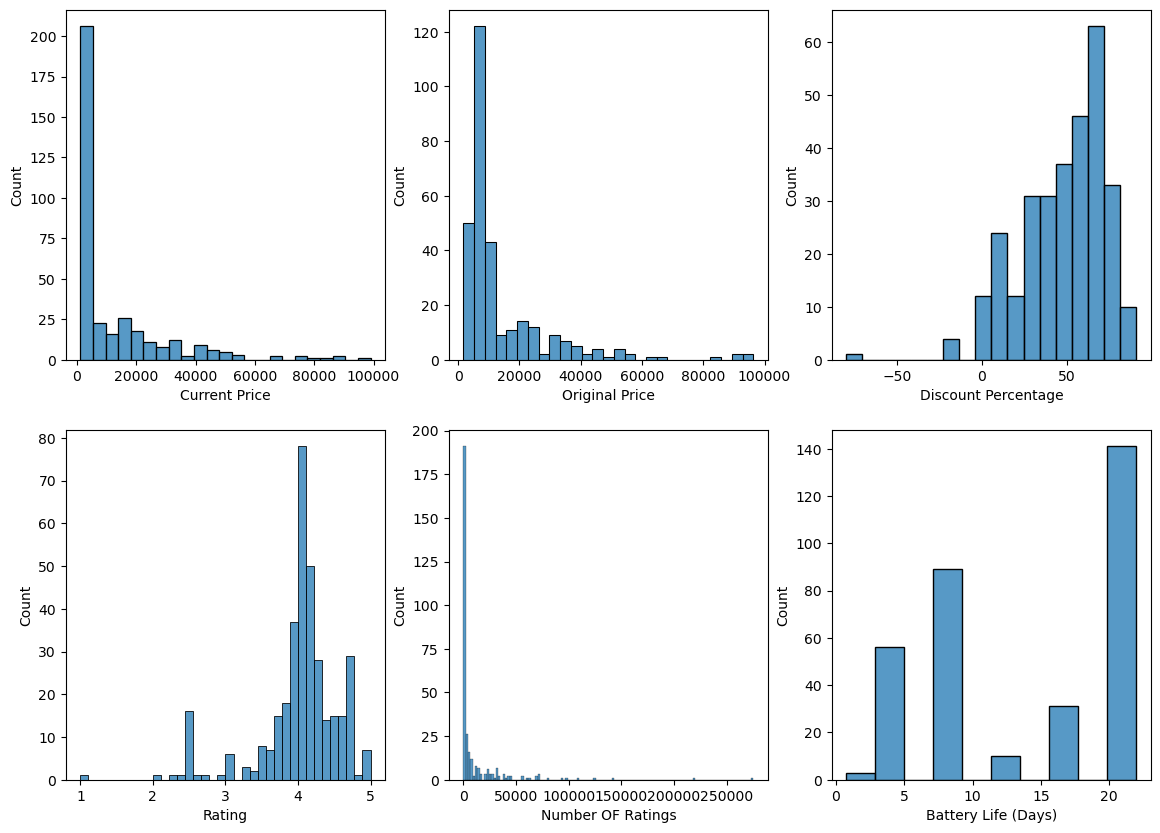

In [39]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14,10))

for i, colum in enumerate(numerical_features):
    print(i, col)
    row = i // 3
    col = i % 3
    print("Row:", row, "Col: ", col)
    ax = axis[row, col]
    print(ax)
    sns.histplot(data=train_df[colum],  ax=ax)
plt.show()

0 2
Row: 0 Col:  0
AxesSubplot(0.125,0.53;0.227941x0.35)
1 0
Row: 0 Col:  1
AxesSubplot(0.398529,0.53;0.227941x0.35)
2 1
Row: 0 Col:  2
AxesSubplot(0.672059,0.53;0.227941x0.35)
3 2
Row: 1 Col:  0
AxesSubplot(0.125,0.11;0.227941x0.35)
4 0
Row: 1 Col:  1
AxesSubplot(0.398529,0.11;0.227941x0.35)
5 1
Row: 1 Col:  2
AxesSubplot(0.672059,0.11;0.227941x0.35)


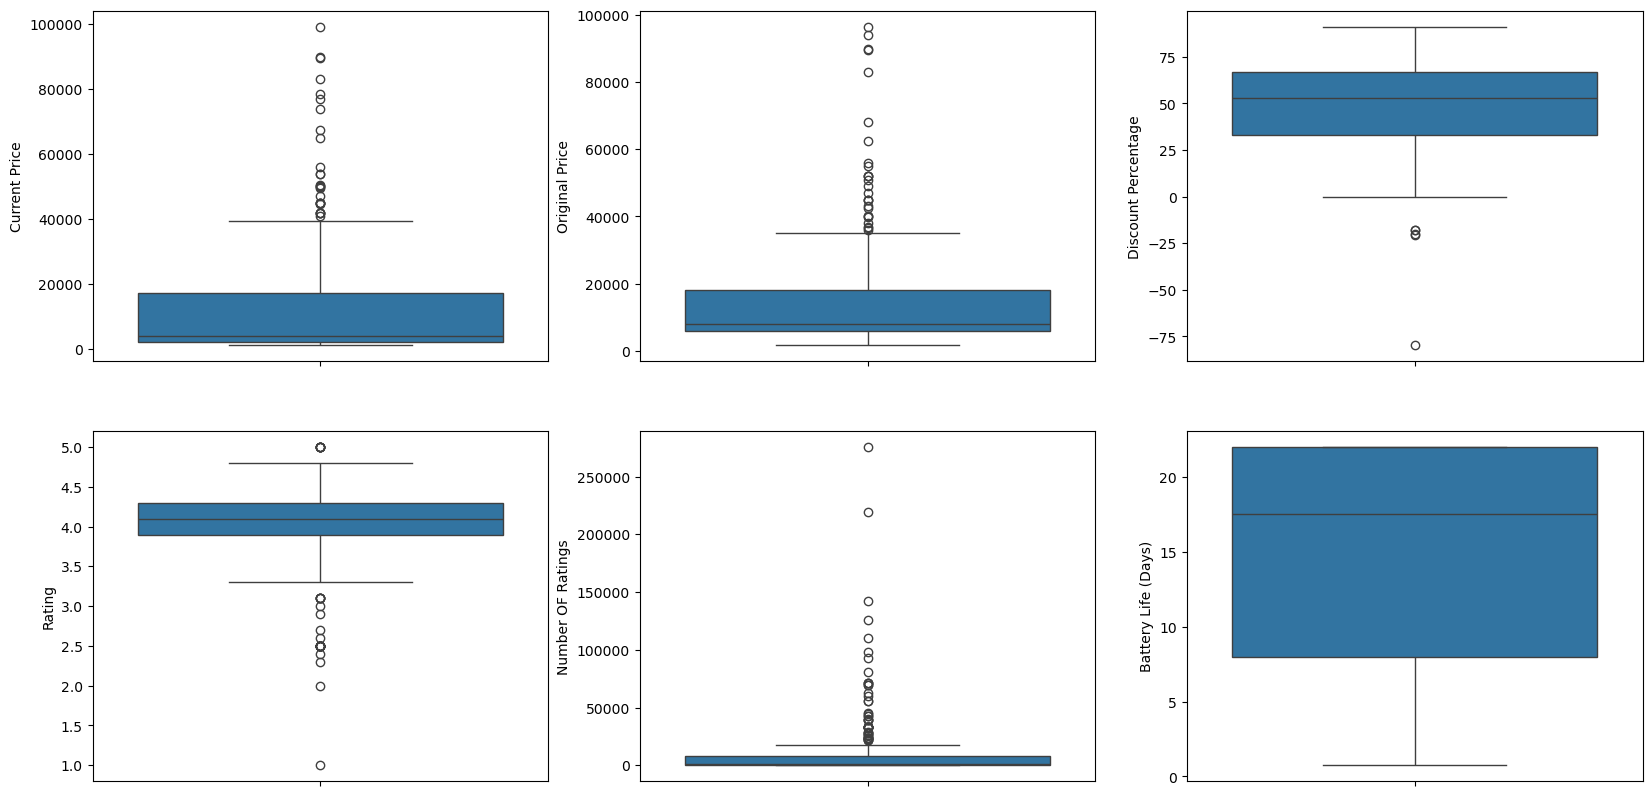

In [44]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

for i, colum in enumerate(numerical_features):
    print(i, col)
    row = i // 3
    col = i % 3
    print("Row:", row, "Col: ", col)
    ax = axis[row, col]
    print(ax)
    sns.boxplot(data=train_df[colum],  ax=ax)
plt.show()

0 2
Row: 0 Col:  0
AxesSubplot(0.125,0.53;0.227941x0.35)
1 0
Row: 0 Col:  1
AxesSubplot(0.398529,0.53;0.227941x0.35)
2 1
Row: 0 Col:  2
AxesSubplot(0.672059,0.53;0.227941x0.35)
3 2
Row: 1 Col:  0
AxesSubplot(0.125,0.11;0.227941x0.35)
4 0
Row: 1 Col:  1
AxesSubplot(0.398529,0.11;0.227941x0.35)
5 1
Row: 1 Col:  2
AxesSubplot(0.672059,0.11;0.227941x0.35)


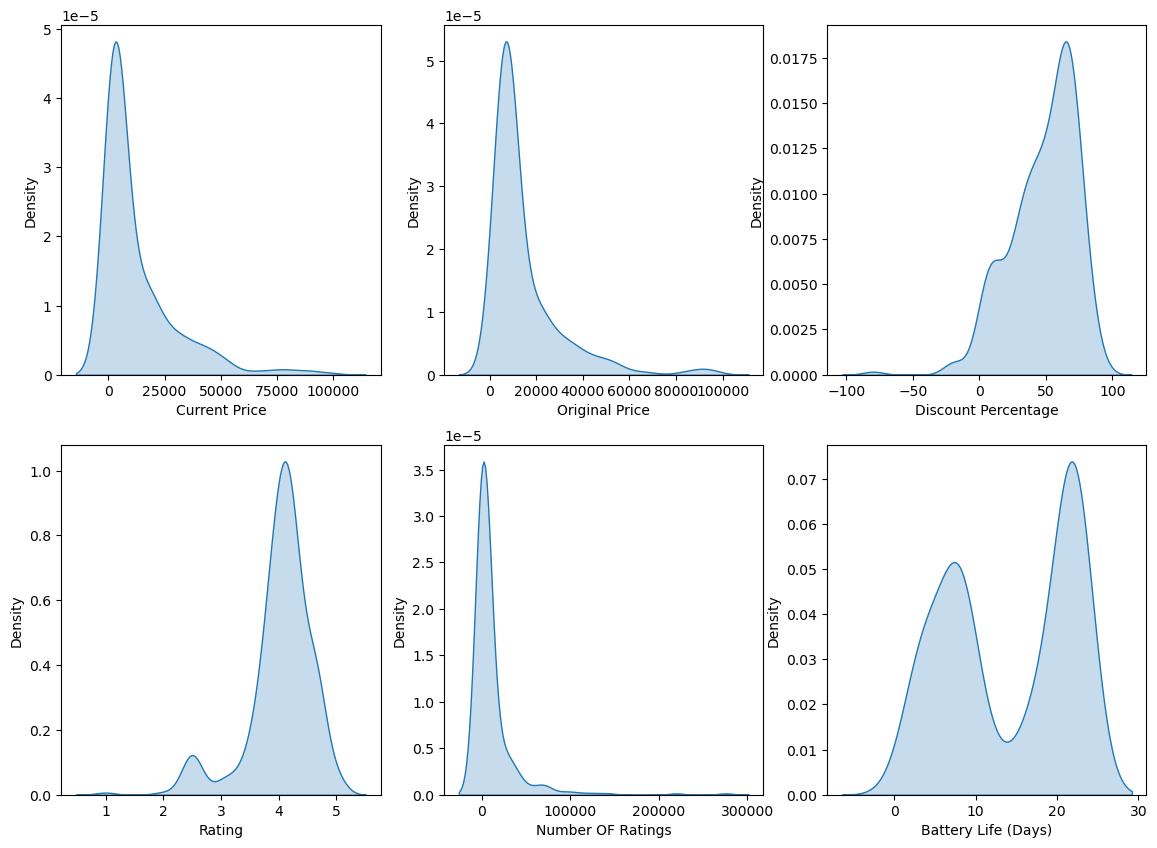

In [49]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14,10))

for i, colum in enumerate(numerical_features):
    print(i, col)
    row = i // 3
    col = i % 3
    print("Row:", row, "Col: ", col)
    ax = axis[row, col]
    print(ax)
    sns.kdeplot(data=train_df[colum],  ax=ax, fill=True)
plt.show()

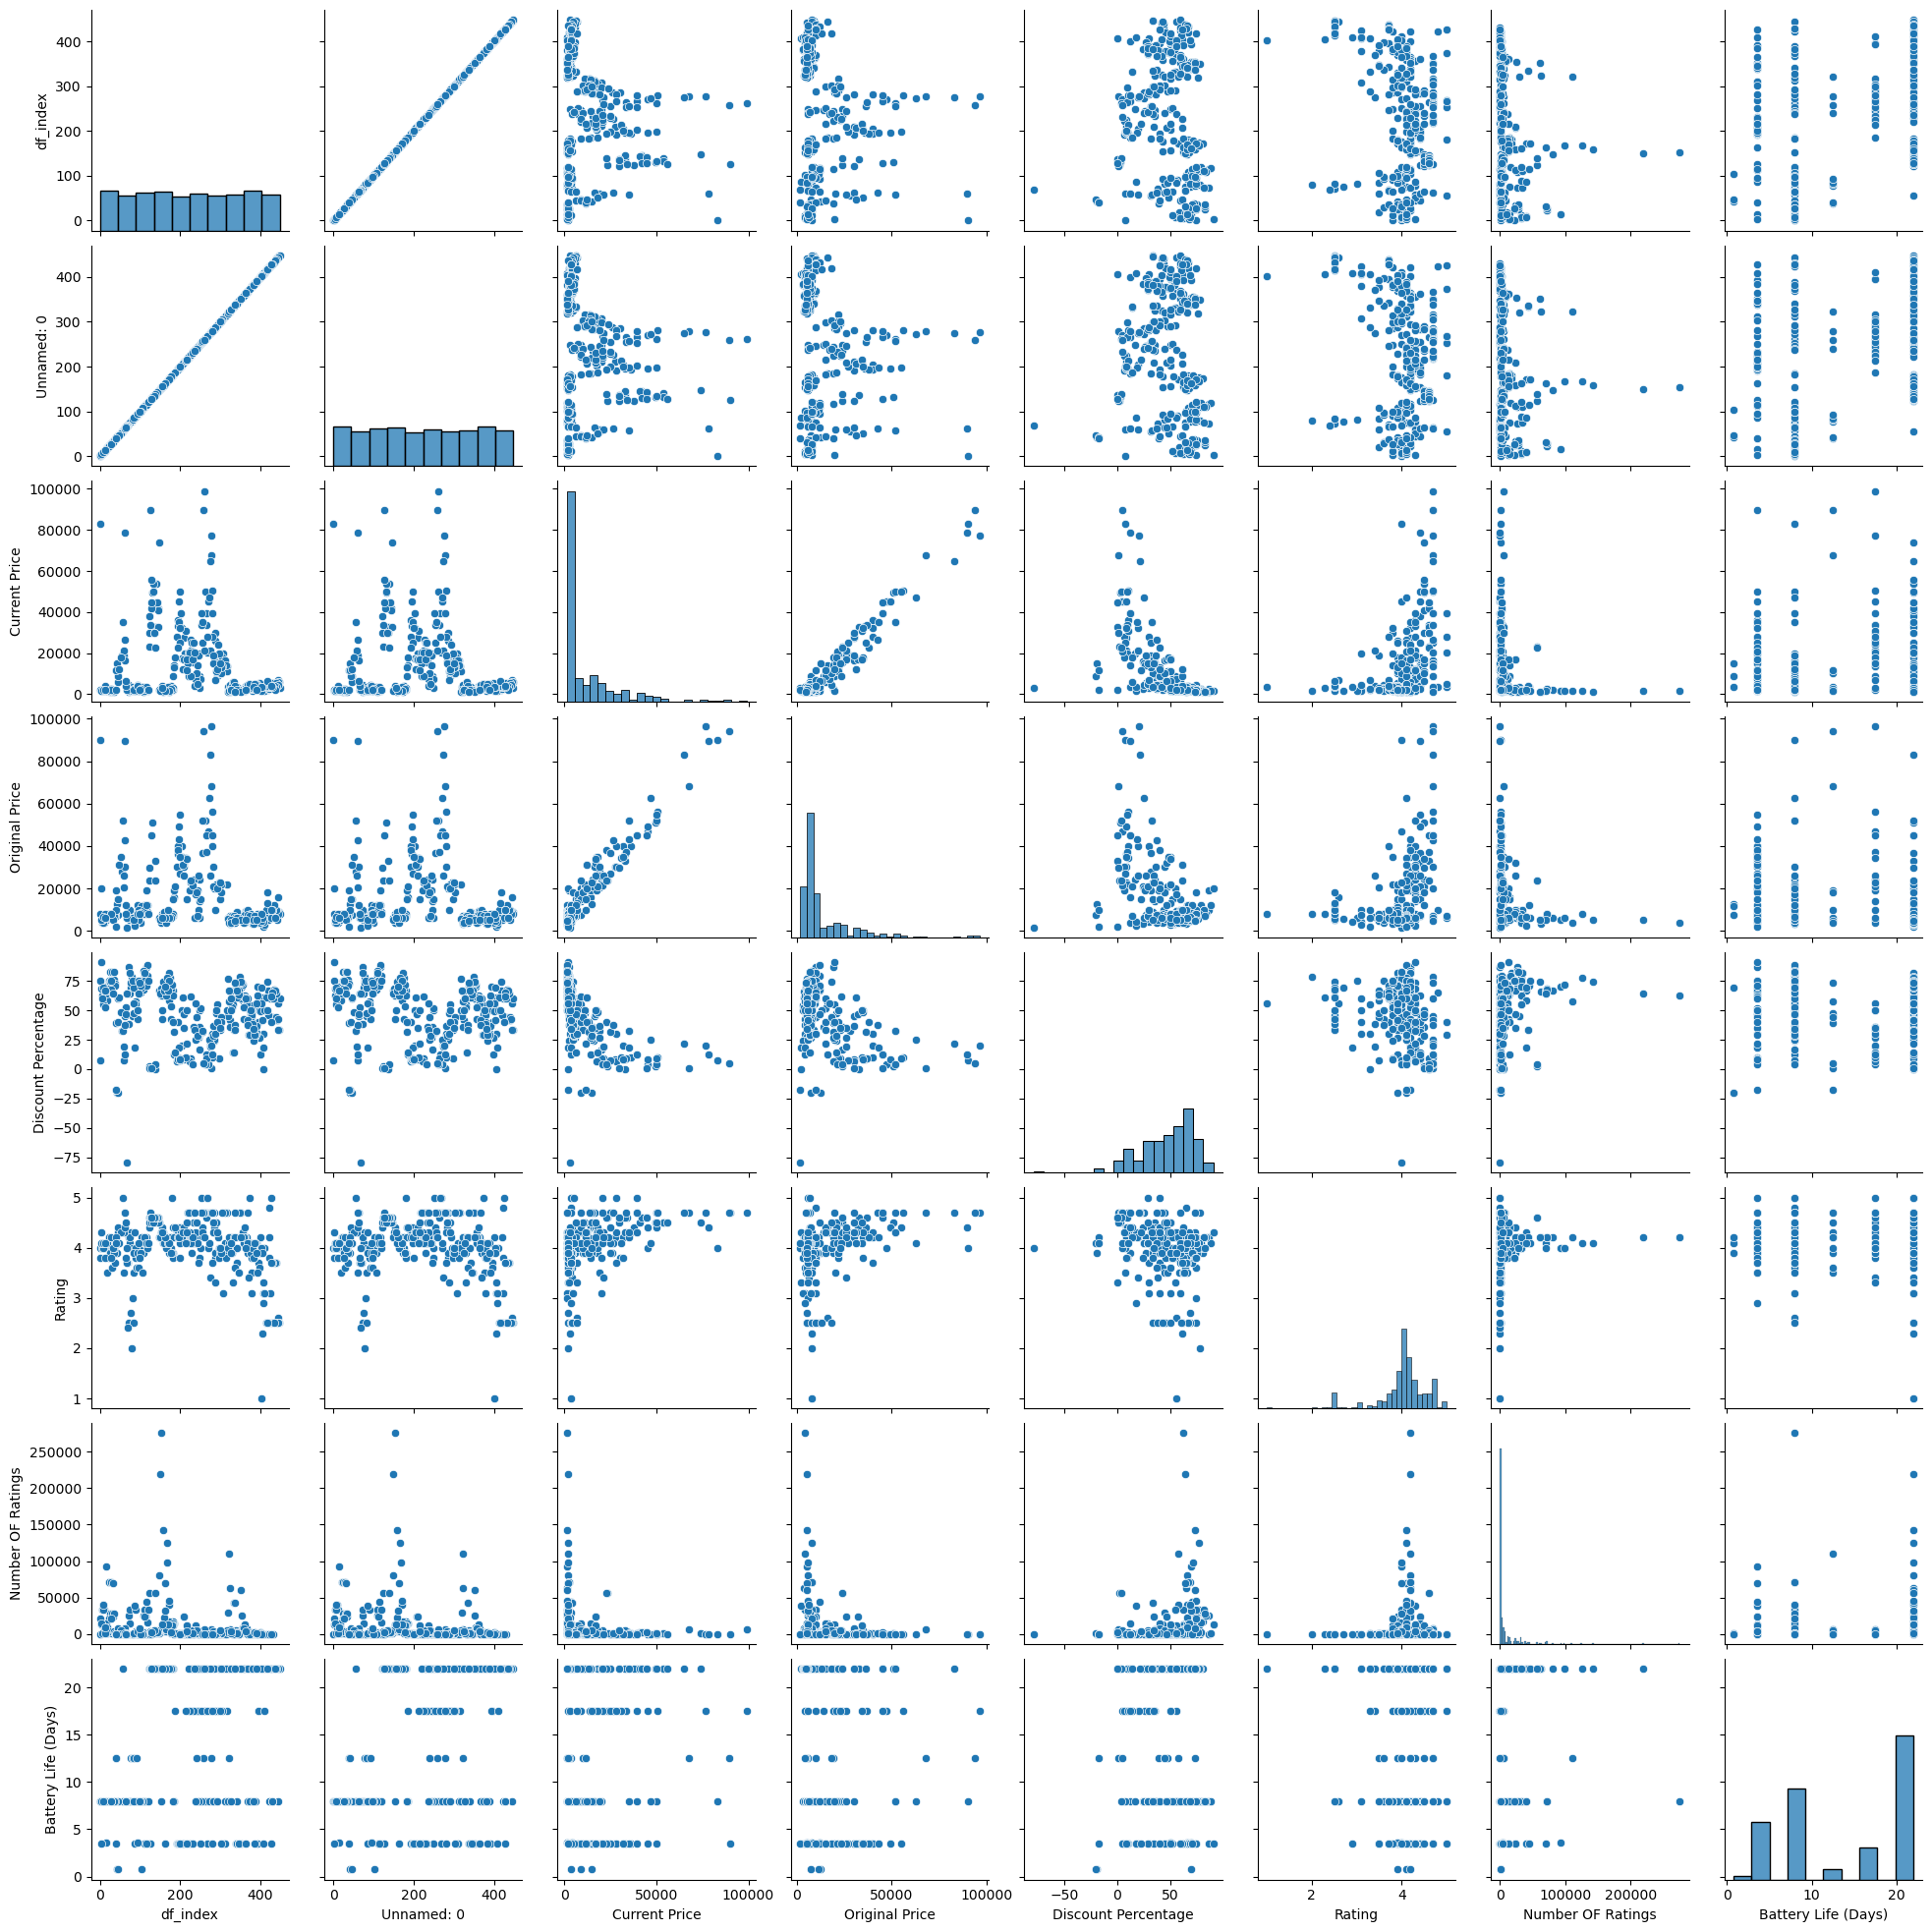

In [50]:
sns.pairplot(train_df)

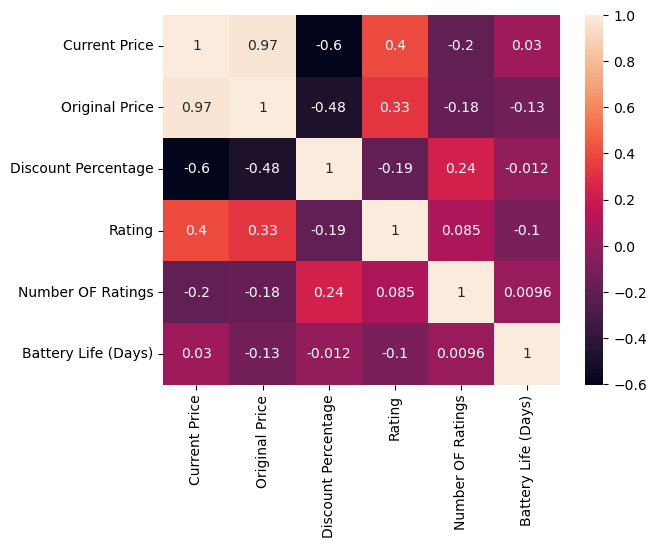

In [56]:
sns.heatmap(train_df[numerical_features].corr(), annot=True)
plt.show()